# Étude	comparative	des	modèles	de	classification

# Importation des librairies
Importation des librairies

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

 Chargement des données fichier diabetes.csv dans la variable data


In [2]:
data = pd.read_csv('diabetes.csv')
# NB : le projet projet.ipynb et le fichier diabetes.csv sont dans le meme dossier

In [3]:
data.shape

(768, 9)

In [4]:
for col in data.columns:
    print(col, len(data[col].unique()))

Pregnancies 17
Glucose 136
BloodPressure 47
SkinThickness 51
Insulin 186
BMI 248
DiabetesPedigreeFunction 517
Age 52
Outcome 2


In [5]:
# Affichage des données
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
# Séparation des variables prédictives et de la variable cible
X = data.drop('Outcome', axis=1)
y = data['Outcome']
# Affichage des variables X et y
print("X:")
# Affichage des premières lignes de X
print(X.head()) 
# Affichage des premières lignes de y   
print("\ny:")
print(y.head())  

X:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  

y:
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [7]:

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Affichage des variables
print("X_train:")
print(X_train.head())  # Affichage des premières lignes de X_train
print("\nX_test:")
print(X_test.head())  # Affichage des premières lignes de X_test
print("\ny_train:")
print(y_train.head())  # Affichage des premières lignes de y_train
print("\ny_test:")
print(y_test.head())  # Affichage des premières lignes de y_test

# Afficher le nombre de lignes de chaque variable
print(f"Nombre de lignes dans X_train: {len(X_train)}")
print(f"Nombre de lignes dans X_test: {len(X_test)}")
print(f"Nombre de lignes dans y_train: {len(y_train)}")
print(f"Nombre de lignes dans y_test: {len(y_test)}")



X_train:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
60             2       84              0              0        0   0.0   
618            9      112             82             24        0  28.2   
346            1      139             46             19       83  28.7   
294            0      161             50              0        0  21.9   
231            6      134             80             37      370  46.2   

     DiabetesPedigreeFunction  Age  
60                      0.304   21  
618                     1.282   50  
346                     0.654   22  
294                     0.254   65  
231                     0.238   46  

X_test:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
668            6       98             58             33      190  34.0   
324            2      112             75             32        0  35.7   
624            2      108             64              0        0  30.8   
690            8   

Le nombre de lignes X_train + X_test = y_train + y_test = au nombre de lignes de notre dataset = 768 lignes

Prédictions du modèle Logistic Regression: [0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]
Nombre de prédictions du modèle Logistic Regression: 154
La matrice de confusion : 
[[78 21]
 [18 37]]

Métriques pour le modèle Logistic Regression:
Precision: 0.6379310344827587
Recall: 0.6727272727272727
F1-score: 0.6548672566371682
Support - Class 0: 99
Support - Class 1: 55
Accuracy : 0.7467532467532467

Les données à prédire : [[6, 148, 72, 35, 0, 33.6, 0.627, 40], [6, 148, 72, 35, 0, 33.6, 0.627, 60]]
Les classes prédictes de ces données : [1 1]

Prédictions du modèle Decision Tree: [0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1
 0 0 1 0 1 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


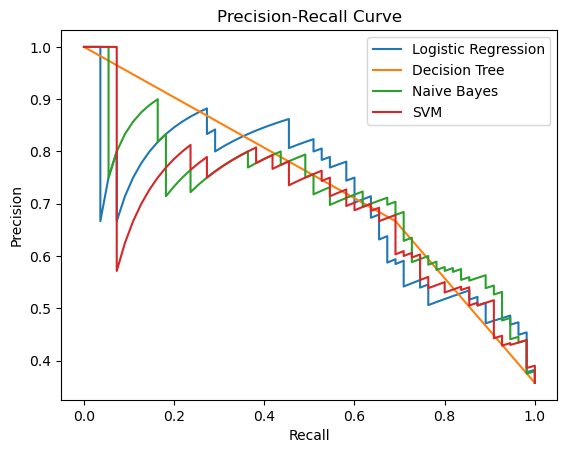

In [8]:

# Initialisation des modèles
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(probability=True)  # Assurez-vous d'activer la probabilité pour SVC
}

# Prédictions pour chaque modèle sur les nouvelles données
for name, model in models.items():
    model.fit(X_train, y_train)  # Entraîner sur l'ensemble d'entraînement
    
    # Prédictions sur l'ensemble de test
    predictions = model.predict(X_test)

    # Affichage des prédictions du modèle
    print(f"Prédictions du modèle {name}: {predictions}")

    # Affichage du nombre de prédictions
    print(f"Nombre de prédictions du modèle {name}: {len(predictions)}")
    
    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, predictions)
    print(f"La matrice de confusion : ")
    print(cm)

    # Calcul des probabilités prédites pour la courbe de précision-rappel
    y_scores = model.predict_proba(X_test)[:, 1]
    
    # Calcul des valeurs pour la courbe de précision-rappel
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_scores)
    
    # Affichage des métriques pour chaque modèle
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, predictions, average='binary')

    # Calculer le taux de performance du modèle
    accuracy = model.score(X_test, y_test)

    # Calculer le support pour chaque classe
    support_class_0 = y_test.value_counts()[0]
    support_class_1 = y_test.value_counts()[1]

    print(f"\nMétriques pour le modèle {name}:")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print(f"Support - Class 0: {support_class_0}")
    print(f"Support - Class 1: {support_class_1}")
    print(f"Accuracy : {accuracy}\n")

    # Exemple de données à prédire
    Test_Data = [
        [6, 148, 72, 35, 0, 33.6, 0.627, 40],
        [6, 148, 72, 35, 0, 33.6, 0.627, 60]
    ]
    print(f"Les données à prédire : {Test_Data}")
    # Prediction 
    predict = model.predict(Test_Data)
    print(f"Les classes prédictes de ces données : {predict}\n")
    
    # Tracé de la courbe de précision-rappel pour chaque modèle
    plt.plot(recall_curve, precision_curve, label=name)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()
